# <font color = "Blue"> Examen III</font>
##### <font color = "DarkBlue"> Data Science Bootcamp - Math and Stats </font>
##### <font color = "DarkBlue"> 28th, February 2021 </font>
##### <font color = "DarkBlue"> Prof. Dr. Juanjo Manjarín </font> 
----

Use the following cell to load all the modules of the exam

In [1]:
# Main -------------------------------------------------------------------------------------------------------------
import pandas as pd
import numpy as np
import os
import scipy.stats as ss

# Viz --------------------------------------------------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
plt.style.use('seaborn')
rcParams['figure.figsize'] = 12, 5

# Association Rules libraries---------------------------------------------------------------------------------------
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

# Data Prep --------------------------------------------------------------------------------------------------------
from sklearn import preprocessing as pp
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.model_selection import learning_curve, ShuffleSplit, validation_curve
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve,average_precision_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score


# Algorithms -------------------------------------------------------------------------------------------------------
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

and now connect to the drive in case you are using colab

In [2]:
# not necessary in my case
# %load_ext nb_black

## Groceries

**The owners of a grocer's shop has generated a small dataset containing different tickets from a set of customers (find it under the name `groceries.csv` in the exam folder). Find different patterns in the dataset using the *association rules* and explain them. For this you will have to decide and explain the following**

 * **Select a support threshold**
 * **A threshold from a metric and arange rules from it**

**Once you have found some relevant rules, explain them and explain to the owner the different behaviours of his customers**

In [3]:
# First we read the data
groc = pd.read_csv("groceries.csv")
print(groc.shape)
groc.head()

(9835, 33)


,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Create a TransactionEncoder instance
te = TransactionEncoder()

# Create a list of lists in which every sublist contains the purchased items and no null values
clean_groc = [[x for x in y if not pd.isnull(x)] for y in groc.iloc[:, 1:].values]

# Transform our dataframe so that each column is an item and each row an order,
# therefore the values with indicate whether the item is present or not in the order
te_ary = te.fit(clean_groc).transform(clean_groc)

# And finally, build a dataframe using the TransactionEncoder output
dataset = pd.DataFrame(te_ary, columns=te.columns_)
dataset.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [5]:
# find a support value for the aprori algorithm that will give us at least some relationships between items
# we use supports from 1% to 20% and count the number of multi-item relations found.
for sup in np.arange(0.01, 0.21, 0.01):
    frequent_itemsets = apriori(dataset, min_support=sup, use_colnames=True)
    print("With a minimum support of {:.2} there are {} relations with more than one item".format(
          sup, len(frequent_itemsets.loc[frequent_itemsets.itemsets.apply(len) > 1, :])))

With a minimum support of 0.01 there are 245 relations with more than one item
With a minimum support of 0.02 there are 63 relations with more than one item
With a minimum support of 0.03 there are 19 relations with more than one item
With a minimum support of 0.04 there are 9 relations with more than one item
With a minimum support of 0.05 there are 3 relations with more than one item
With a minimum support of 0.06 there are 1 relations with more than one item
With a minimum support of 0.07 there are 1 relations with more than one item
With a minimum support of 0.08 there are 0 relations with more than one item
With a minimum support of 0.09 there are 0 relations with more than one item
With a minimum support of 0.1 there are 0 relations with more than one item
With a minimum support of 0.11 there are 0 relations with more than one item
With a minimum support of 0.12 there are 0 relations with more than one item
With a minimum support of 0.13 there are 0 relations with more than one i

Based in the values obtained before, it seems reasonable to set the <k>min_support</k> value of 0.04 so that we can analyze 9 relationships. Let's see the relations with more than two items we find with that support.

In [6]:
frequent_itemsets = apriori(dataset, min_support=0.04, use_colnames=True)
frequent_itemsets.loc[frequent_itemsets.itemsets.apply(len) > 1]

,support,itemsets
32,0.042603,"(rolls/buns, other vegetables)"
33,0.047382,"(other vegetables, root vegetables)"
34,0.074835,"(other vegetables, whole milk)"
35,0.043416,"(yogurt, other vegetables)"
36,0.056634,"(rolls/buns, whole milk)"
37,0.048907,"(whole milk, root vegetables)"
38,0.040061,"(whole milk, soda)"
39,0.042298,"(tropical fruit, whole milk)"
40,0.056024,"(yogurt, whole milk)"


Now we calculate the association rules, setting the min_threshold of the joint support at the same value we selected before.

In [7]:
association_rules(frequent_itemsets, metric="support", min_threshold=0.04).sort_values(by="lift", ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(other vegetables),(root vegetables),0.193493,0.108998,0.047382,0.244877,2.246605,0.026291,1.179941
3,(root vegetables),(other vegetables),0.108998,0.193493,0.047382,0.434701,2.246605,0.026291,1.426693
10,(whole milk),(root vegetables),0.255516,0.108998,0.048907,0.191405,1.756031,0.021056,1.101913
11,(root vegetables),(whole milk),0.108998,0.255516,0.048907,0.448694,1.756031,0.021056,1.350401
6,(yogurt),(other vegetables),0.139502,0.193493,0.043416,0.311224,1.608457,0.016424,1.170929
7,(other vegetables),(yogurt),0.193493,0.139502,0.043416,0.224383,1.608457,0.016424,1.109436
14,(tropical fruit),(whole milk),0.104931,0.255516,0.042298,0.403101,1.577595,0.015486,1.247252
15,(whole milk),(tropical fruit),0.255516,0.104931,0.042298,0.165539,1.577595,0.015486,1.072631
16,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132
17,(whole milk),(yogurt),0.255516,0.139502,0.056024,0.219260,1.571735,0.020379,1.102157


We find 18 association rules, whole milk involved in most of them, all of them with rather small supports (the higher one at 7%), weak leverages (as expected, because our priors already had small supports), positive lifts everywhere but small values (so we have not detected any substitute products), and convictions close to one in most cases, pointing out to almost random association.

Let's interpret one of the rules in this table, for example the one for 

\begin{equation}
\text{yogurt} \to \text{whole milk}
\end{equation}

has as values

<br>

| Antecedent | Consequent | Support | Confidence | Lift | Leverage | Conviction |
|:----------:|:----------:|:-------:|:----------:|:----:|:--------:|:----------:|
| 0.14 | 0.26 | 0.06 | 0.40 | 1.6 | 0.02 | 1.24 | 

<br>

 * **Support**: The rule appears in 6% of the transactions
 * **Confidence**: The probability that someone buys <k>whole milk</k> if they have already bought <k>yogurt</k> is 40%
 * **Lift**: Since it is 1.6, i.e. positive, the goods are not independent and it is likely that when customers buy one, they buy the other
 * **Leverage**: Leverage finds associations for high support items, and our rule has a low one, therefore leverage is very weak.
 * **Conviction**: A value of 1.24 means that the rule would return 1.24 times more wrong predictions if the association rule was purely due to random chance

A possible interpretation to our store owners would be that most of the customers go to the store to pick up only one item, so we could guess their prices are high and customers go there only for last-minute shopping (to get something they forgot to buy where they got most of their needs). It is also outstanding that whole milk is present in most of the associations found, so maybe improving milk price would attract more customers who would buy other items with it.

## NBA Longevity

**The dataset `nba_longevity.csv` contains some statistics of different NBA basketball players (the meaning of the names of the variables can be found in any basketball statistics page). The aim of this analysis is to create Naïve Bayes and K-Nearest Neighbors classiffiers that may let you understand from those statistics whether or not the player will last 5 years playing at the highest level.**

**Load the dataset**

In [8]:
# First we read the data
nba_data = pd.read_csv("nba_longevity.csv")
print(nba_data.shape)
nba_data.head()

(1340, 20)


,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1


### Train/Test

**Use cross-validation to identify the *best* set of parameters for both classifiers (`var_smoothing` and `n_neighbors`) as well as the sample size needed for training, then perform a train/test split in the dataset**

In [15]:
# initiate the two models
model_nb = GaussianNB()
model_knn = KNeighborsClassifier()

# create two param dictionaries
params_NB = {"var_smoothing": np.logspace(0, -9, num=100)}
params_knn = {"n_neighbors": range(1, 30)}

# integrate everything in lists
models = [model_nb, model_knn]
params = [params_NB, params_knn]
model_names = ["Naïve Bayes", "KNN"]

# create empty lists to get results of each output
best_params = []
train_scores, train_scores_mean, train_scores_std = [], [], []
test_scores, test_scores_mean, test_scores_std, = [], [], []
train_sizes, fit_times, fit_times_mean, fit_times_std = [], [], [], []

# create stratified k fold with 10 splits for cross-validation
skf = StratifiedKFold(n_splits=10)

# create splits of training sets
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=np.random.RandomState(1))

# for each classifier
for m in range(len(models)):

    # perform the search for the best hyperparameter using cross-validation
    gs = GridSearchCV(models[m], cv=skf, param_grid=params[m], return_train_score=True)

    x_train, x_test, y_train, y_test = train_test_split(nba_data.iloc[:, :-1], nba_data["TARGET_5Yrs"])

    gs.fit(x_train, y_train)

    print("The best hyperparameter for the {} classifier is {}".format(model_names[m], gs.best_params_))
    best_params.append(gs.best_params_)

    # perform the search for the best training size
    train_sz, train_sc, test_sc, fit_t, _ = learning_curve(
        models[m],
        nba_data.iloc[:, :-1],
        nba_data["TARGET_5Yrs"],
        cv=cv,
        n_jobs=4,
        train_sizes=np.linspace(0.1, 1.0, 50),
        return_times=True,
    )
    train_sizes.append(train_sz)
    train_scores.append(train_sc)
    test_scores.append(test_sc)
    fit_times.append(fit_t)

    # Mean Values ------------------------------------------------------------------
    train_scores_mean.append(np.mean(train_scores[m], axis=1))
    train_scores_std.append(np.std(train_scores[m], axis=1))
    test_scores_mean.append(np.mean(test_scores[m], axis=1))
    test_scores_std.append(np.std(test_scores[m], axis=1))
    fit_times_mean.append(np.mean(fit_times[m], axis=1))
    fit_times_std.append(np.std(fit_times[m], axis=1))

The best hyperparameter for the Naïve Bayes classifier is {'var_smoothing': 0.533669923120631}
The best hyperparameter for the KNN classifier is {'n_neighbors': 13}


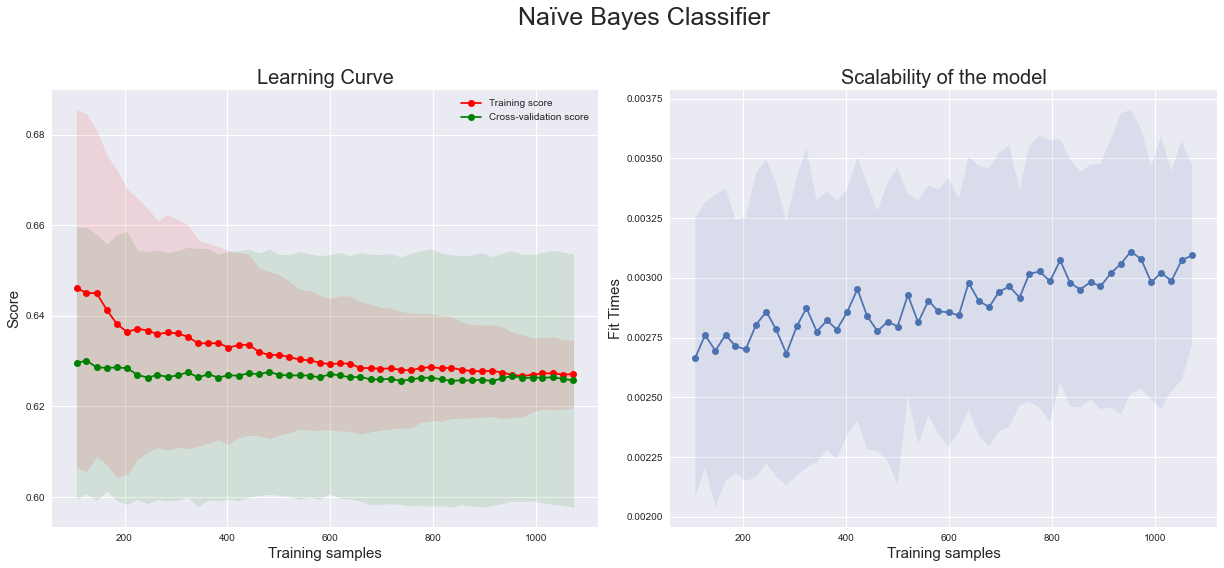

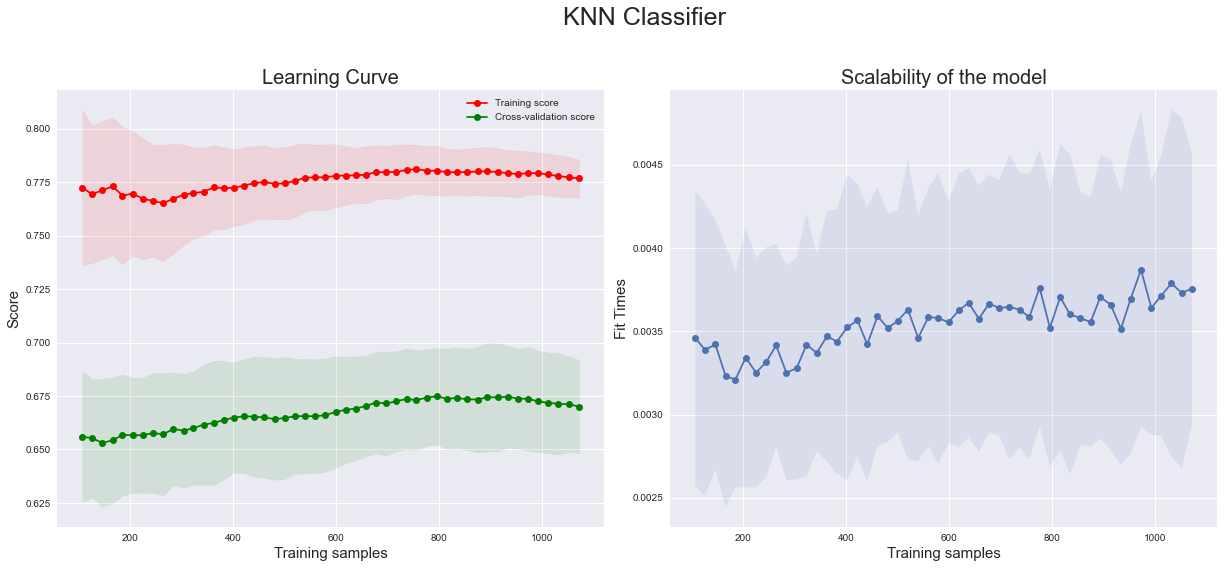

In [16]:
# plot what we obtained

# for each classifier
for m in range(len(models)):
    # Create a plot with 2 figures with the corresponding title
    plt.figure(figsize=(18, 8))
    plt.suptitle(model_names[m] + " Classifier", fontsize=25)

    # Plot 1: Learning Curve
    plt.subplot2grid((1, 2), (0, 0))
    plt.title("Learning Curve", fontsize=20)
    
    # Plot the training scores line and the confidence interval
    plt.plot(train_sizes[m], train_scores_mean[m], "o-", color="r", label="Training score")
    plt.fill_between(
        train_sizes[m],
        train_scores_mean[m] - train_scores_std[m],
        train_scores_mean[m] + train_scores_std[m],
        alpha=0.1,
        color="r",
    )
    
    # Plot the cross-validation scores and the confidence interval
    plt.plot(train_sizes[m], test_scores_mean[m],  "o-", color="g", label="Cross-validation score")
    plt.fill_between(
        train_sizes[m],
        test_scores_mean[m] - test_scores_std[m],
        test_scores_mean[m] + test_scores_std[m],
        alpha=0.1,
        color="g",
    )

    # Write the corresponding legend
    plt.xlabel("Training samples", fontsize=15)
    plt.ylabel("Score", fontsize=15)
    plt.legend(loc="best")

    
    # Plot 2: Scalability of the model
    plt.subplot2grid((1, 2), (0, 1))
    plt.title("Scalability of the model", fontsize=20)
    
    # Plot the fit times and the confidence interval
    plt.plot(train_sizes[m], fit_times_mean[m], "o-")
    plt.fill_between(
        train_sizes[m],
        fit_times_mean[m] - fit_times_std[m],
        fit_times_mean[m] + fit_times_std[m],
        alpha=0.1,
    )
    
    # Write the corresponding legend
    plt.xlabel("Training samples", fontsize=15)
    plt.ylabel("Fit Times", fontsize=15)

    # and show the plots
    plt.tight_layout(rect=(0, 0, 0.95, 0.95))
    plt.show()

In the NB Classifier we barely see any improvement after 600 training samples at the cost of computational time, however in the KNN Classifier we see a slightly better result at over 800 samples, but with a higher computational need, being the computational time the least at slightly below 600 with a score not far from the best one. Therefore, we select 590 training samples for both cases.

### Model

**Define the models that you can later use**

In [11]:
# configure the two models with the best hyperparameters calculated before
model_nb = GaussianNB(var_smoothing=best_params[0]["var_smoothing"])
model_knn = KNeighborsClassifier(n_neighbors=best_params[1]["n_neighbors"])

# create a training sample of the size calculated before
nba_train, nba_test = train_test_split(
    nba_data,
    train_size=590,
    random_state=np.random.RandomState(1),
    stratify=nba_data["TARGET_5Yrs"],
)

# for each classifier
for m in range(len(models)):
    # fit the model with the training data
    models[m].fit(nba_train.iloc[:, :-1].values, nba_train["TARGET_5Yrs"])

### Predictions

**Find the predicted output from your models**

In [12]:
# create an empty list to save both models' predictions and the corresponding confusion matrix
predictions, conf_matrix = [], []

# for each classifier
for m in range(len(models)):
    # obtain the predictions for our test data
    predictions.append(models[m].predict(nba_test.iloc[:, :-1].values))

    # calculate the confusion matrix
    conf_matrix.append(confusion_matrix(nba_test["TARGET_5Yrs"], predictions[m]))
    print("Model: " + model_names[m])
    print(conf_matrix[m])

Model: Naïve Bayes
[[242  43]
 [237 228]]
Model: KNN
[[143 142]
 [114 351]]


In both cases we can see that the dataset seems fairly balance, however our models create a high number of wrong predictions. Let's put numbers to that in the following section.

### Metrics

**Evaluate the models using the common metrics (*accuracy*, *precision* and *recall*). Explain what these tell you about the model**

In [13]:
# for each classifier
for m in range(len(models)):
    # for each possible output value:
    print("Model: " + model_names[m])
    for i in nba_test["TARGET_5Yrs"].unique():
        print("\n   For output value " + str(i))
        print("\tAccuracy: ", "{:.2%}".format(accuracy_score(nba_test["TARGET_5Yrs"], predictions[m])))
        print("\tPrecision: ", "{:.2%}".format(precision_score(nba_test["TARGET_5Yrs"], predictions[m], pos_label=i)))
        print("\tRecall: ", "{:.2%}".format(recall_score(nba_test["TARGET_5Yrs"], predictions[m], pos_label=i)))
    print("=" * 40)

Model: Naïve Bayes

   For output value 1
	Accuracy:  62.67%
	Precision:  84.13%
	Recall:  49.03%

   For output value 0
	Accuracy:  62.67%
	Precision:  50.52%
	Recall:  84.91%
Model: KNN

   For output value 1
	Accuracy:  65.87%
	Precision:  71.20%
	Recall:  75.48%

   For output value 0
	Accuracy:  65.87%
	Precision:  55.64%
	Recall:  50.18%


Accuracy measures the % of correct predictions. Both classifiers have poor performances of around 64%, with a slightly better one in the KNN.

The NB classifier has high precision and low recall in guessing which players WILL keep top performance in the following 5 years, while it has low precision and high recall in guessing which players will not. This means that we capture a lot of players and among them we find most of the top ones, whereas we identify few players who won't perform correctly in the next 5 years, but the ones we identify are definitely not worth hiring. 

The KNN classifier has similar values for both precision and recall in detecting top performers and not performers, so it's not good at anything.

### ROC/PR Curves

**Find the ROC and/or PR curves and explain them**

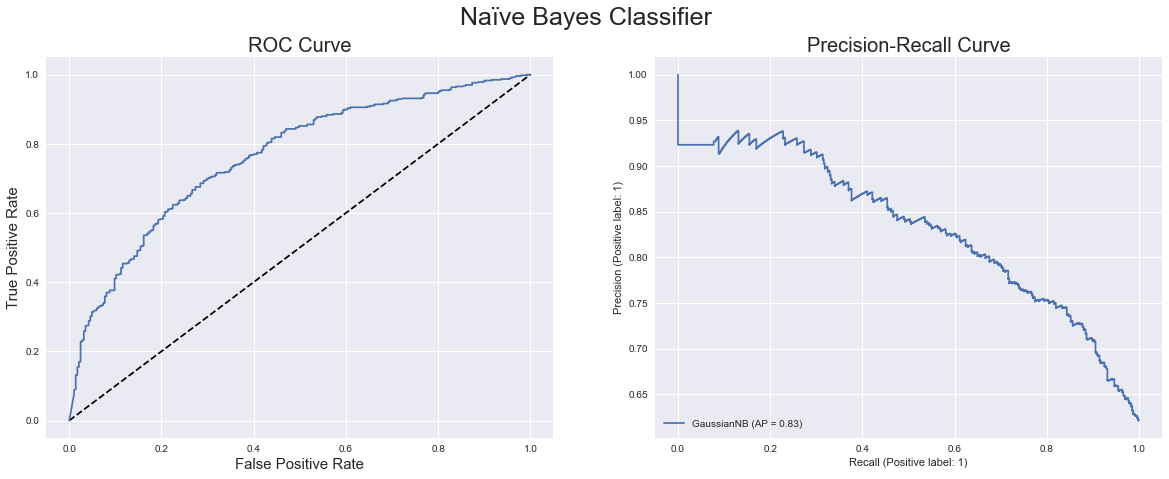

Area under the PR curve for the Naïve Bayes Classifier: 83.48%


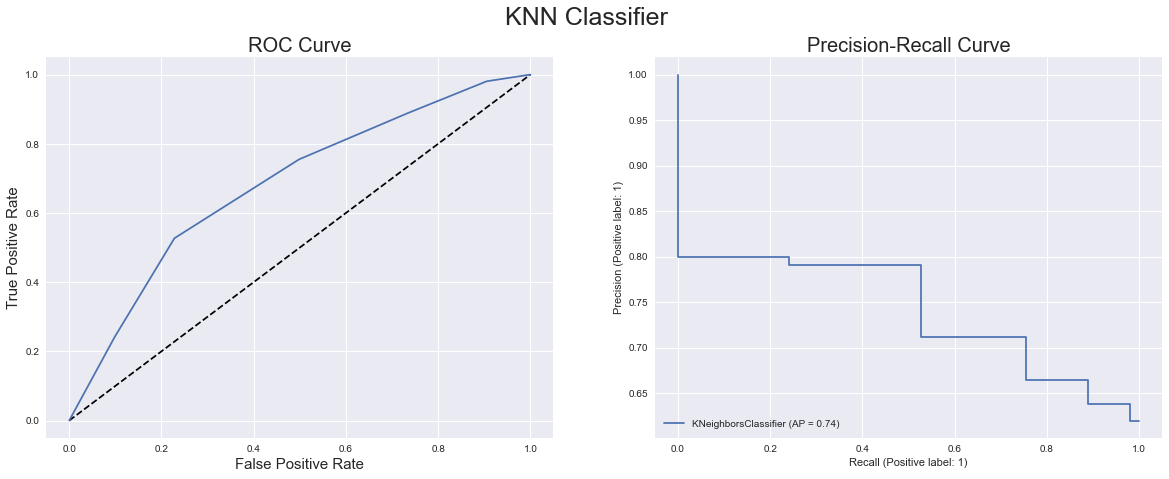

Area under the PR curve for the KNN Classifier: 77.96%


In [14]:
# for each classifier
for m in range(len(models)):
    # calculate curve parameters
    mod_score = models[m].predict_proba(nba_test.iloc[:, :-1].values)
    fp, tp, thresholds = roc_curve(nba_test["TARGET_5Yrs"], mod_score[:, 1], pos_label=1)
    prec, rec, _ = precision_recall_curve(nba_test["TARGET_5Yrs"], mod_score[:, 1], pos_label=1)

    # Create the plot with two subplots
    plt.figure(figsize=(20, 7))
    plt.suptitle(model_names[m] + " Classifier", fontsize=25)
    ax1 = plt.subplot(1, 2, 1)
    ax2 = plt.subplot(1, 2, 2)

    # Plot 1: ROC Curve
    ax1.plot([0, 1], [0, 1], "k--")
    ax1.plot(fp, tp)
    ax1.set_xlabel("False Positive Rate", fontsize=15)
    ax1.set_ylabel("True Positive Rate", fontsize=15)
    ax1.set_title("ROC Curve", fontsize=20)

    # Plot 2: PR Curve
    plot_precision_recall_curve(models[m], nba_test.iloc[:, :-1], nba_test["TARGET_5Yrs"], ax=ax2)
    ax2.set_title("Precision-Recall Curve", fontsize=20)

    # Show the plots
    plt.show()
    
    # Calculate the area under the PR curve
    print("Area under the PR curve for the {} Classifier: {:.2%}".format(model_names[m],auc(rec, prec)))

The area under the ROC curve in the NB Classifier is higher than in the KNN Classifier, the tradeoff between precision and recall is evident and also we can tell, from the calculated AUC in the PR curve that the NB classifier is the better one.

### Comparison

**Explain which model is better to answer the question proposed in the case.**

The NB Classifier seems slightly better at the job, although none of them are good enough. I wouldn't bet my team's hiring policy on any of these classifiers.